In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats  # qq plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('dataset/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.fillna(df['Age'].mean(),inplace=True)

In [5]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [6]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_8368\2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


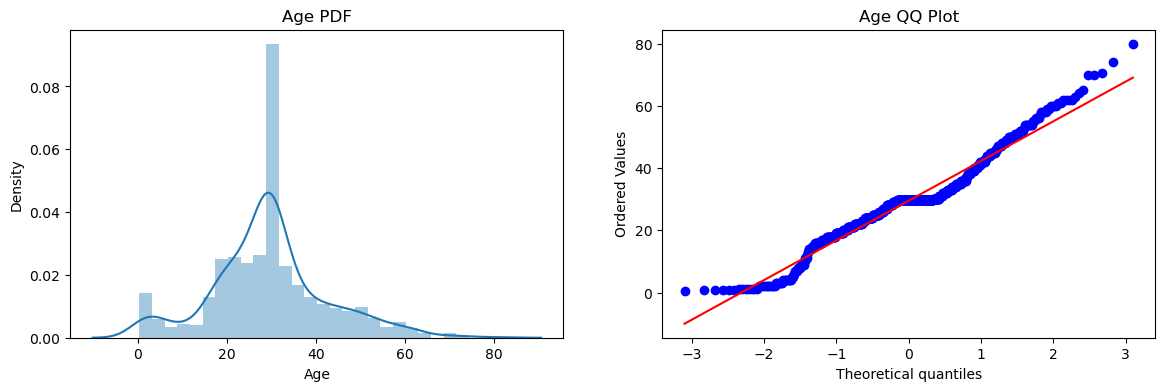

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [9]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_8368\3212760201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


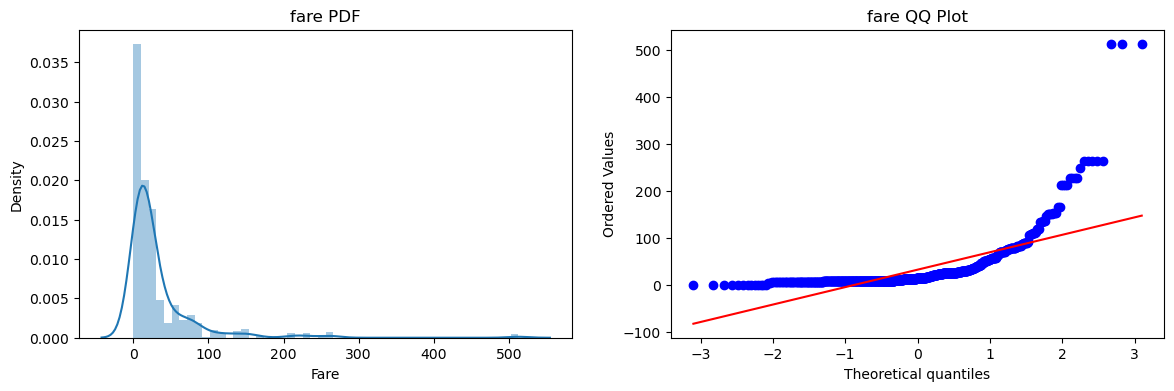

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('fare QQ Plot')

plt.show()

In [11]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


In [12]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [14]:
trf = FunctionTransformer(func=np.log1p)  # add 1 then log

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.658876404494382


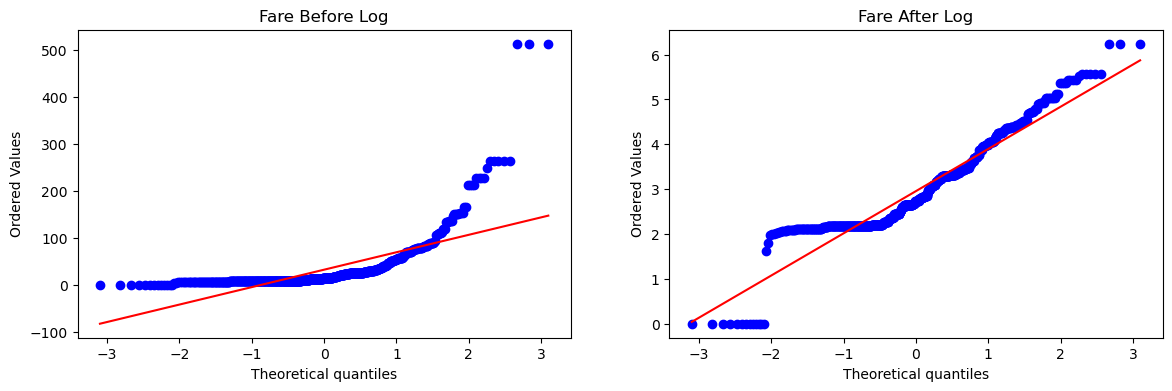

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

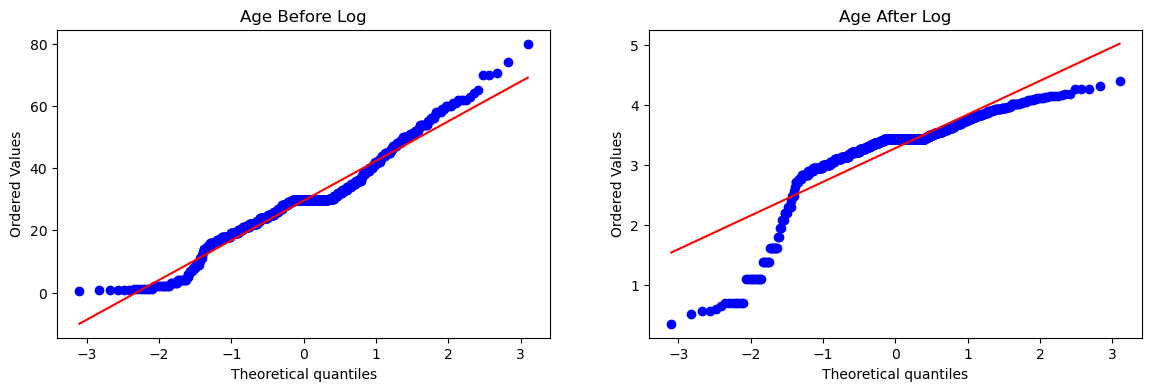

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [20]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [22]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6521223470661673


In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


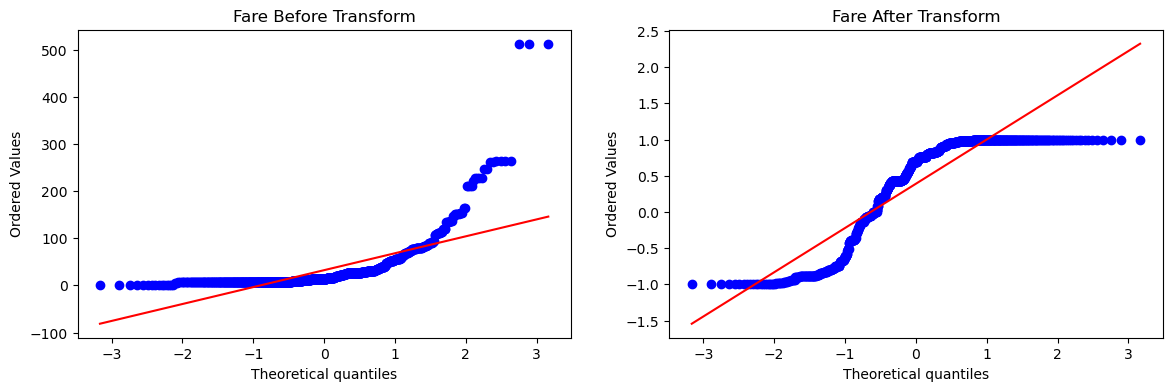

In [24]:
apply_transform(np.sin)

Accuracy 0.6589013732833957


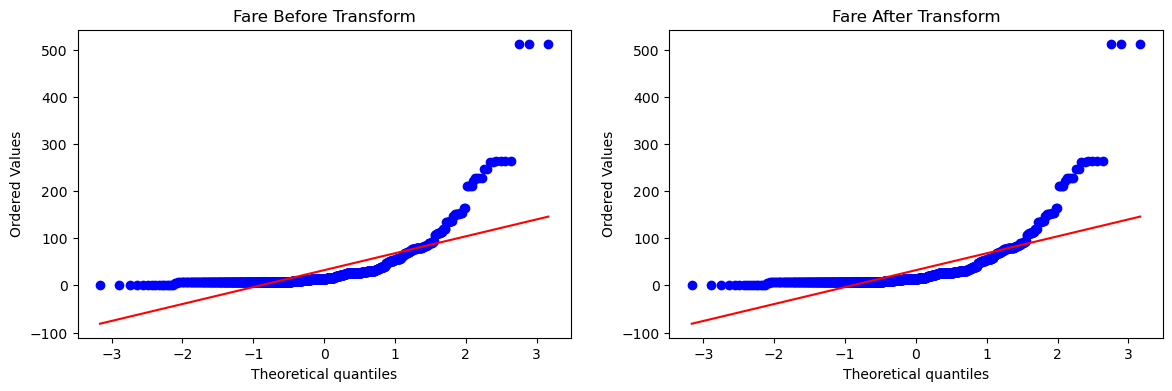

In [25]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


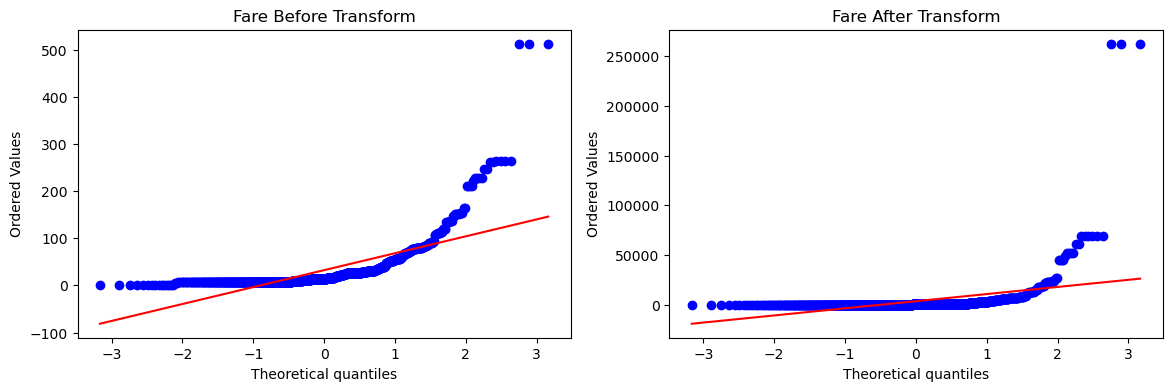

In [26]:
apply_transform(lambda x:x**2)

Accuracy 0.61729088639201


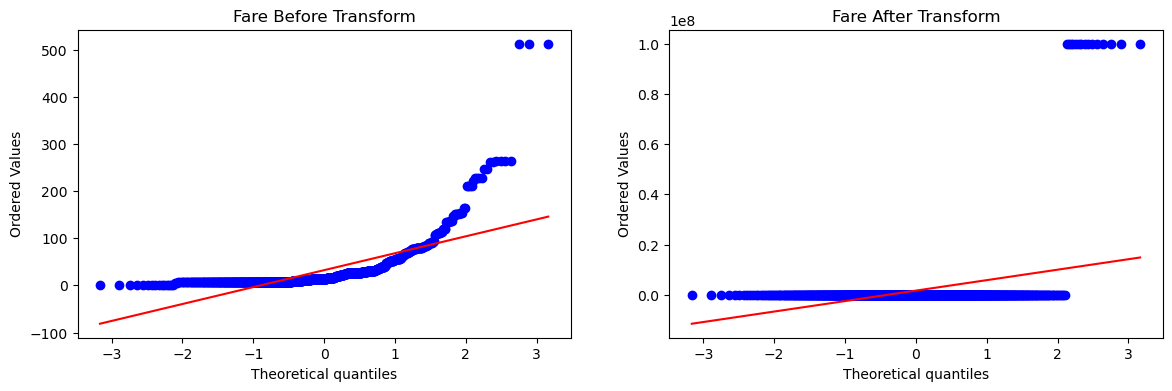

In [27]:
apply_transform(lambda x: 1/(x+0.00000001))

# taking CAR EXAMPLE 

In [28]:
df2 = pd.read_csv('dataset/cars.csv')

In [29]:
df2=df2.sample(500)

In [30]:
# X2 = df2.iloc[:,1]
y2 = df2[['selling_price']]
X2 = df2[['km_driven']] 

In [31]:
X2


,km_driven
7604,30000
479,50000
6104,80000
6520,80000
5414,25000
...,...
2287,30000
910,43000
5629,8500
4886,22000


In [32]:
y2

,selling_price
7604,350000
479,229999
6104,1350000
6520,330000
5414,999000
...,...
2287,320000
910,270000
5629,5500000
4886,220000


In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [34]:
X2_train

,km_driven
4730,35000
3846,8500
4398,53000
6385,50000
4167,30000
...,...
8057,50000
2105,190000
7166,60000
1465,50000


C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_8368\2963098052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2_train['km_driven'])


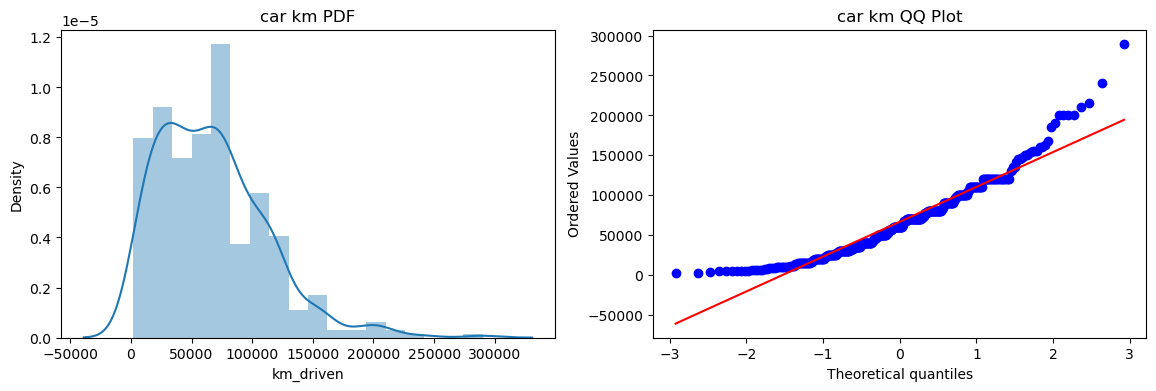

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X2_train['km_driven'])
plt.title('car km PDF')

plt.subplot(122)
stats.probplot(X2_train['km_driven'], dist="norm", plot=plt)
plt.title('car km QQ Plot')

plt.show()

C:\Users\ALOK SINGH\AppData\Local\Temp\ipykernel_8368\326822168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y2_train['selling_price'])


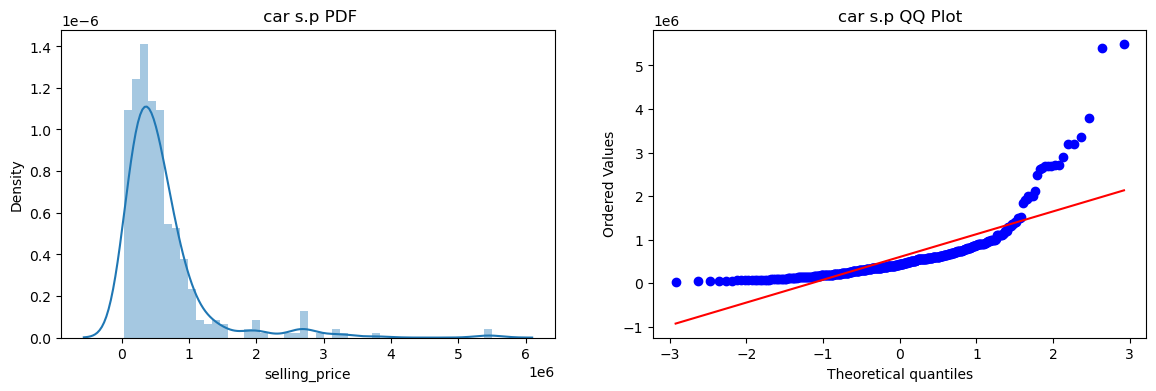

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(y2_train['selling_price'])
plt.title(' car s.p PDF')

plt.subplot(122)
stats.probplot(y2_train['selling_price'], dist="norm", plot=plt)
plt.title('car s.p QQ Plot')

plt.show()

# In machine learning, fit() is used to train the model on the training data set. 
## It calculates the parameters (such as weights) of the model.
## Transform() is used to apply the calculated parameters (from fit()) to the testing data set. 
## It transforms the testing data set using those parametersfit_transform() is used to perform both operations at once.

###  fit() does not change the data. It is used to train the model on the training data set and calculate the parameters (such as weights) of the model. Transform() is used to apply the calculated parameters (from fit()) to the testing data set. 

In [37]:
clf

LogisticRegression()

In [38]:
clf2

DecisionTreeClassifier()

In [39]:
X2_train

,km_driven
4730,35000
3846,8500
4398,53000
6385,50000
4167,30000
...,...
8057,50000
2105,190000
7166,60000
1465,50000


In [40]:
clf.fit(X2_train,y2_train)

C:\Users\ALOK SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALOK SINGH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:

clf2.fit(X2_train,y2_train)
    


DecisionTreeClassifier()

In [42]:
X2_train

,km_driven
4730,35000
3846,8500
4398,53000
6385,50000
4167,30000
...,...
8057,50000
2105,190000
7166,60000
1465,50000


In [43]:
X2_train

,km_driven
4730,35000
3846,8500
4398,53000
6385,50000
4167,30000
...,...
8057,50000
2105,190000
7166,60000
1465,50000


In [44]:
 
y2_pred = clf.predict(X2_test)
y2_pred1 = clf2.predict(X2_test)
    
print("Accuracy LR",accuracy_score(y2_test,y2_pred))
print("Accuracy DT",accuracy_score(y2_test,y2_pred1))

Accuracy LR 0.03
Accuracy DT 0.02


In [47]:
X3_train =np.cbrt(X2_train)

In [50]:
clf.fit(X2_train,y2_train)
clf2.fit(X2_train,y2_train)

    
y2_pred = clf.predict(X2_test)
y2_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

C:\Users\ALOK SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ALOK SINGH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()